# Collaboration and Competition##

### 1. Start the Environment

In [1]:
from unityagents import UnityEnvironment
import numpy as np

In [2]:
env = UnityEnvironment(file_name="/home/yao/Udacity Deep Reinforcement Learning/deep-reinforcement-learning/p3_collab-compet/Tennis_Linux/Tennis.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Watch an Untrrined Agent in the Environment. (Random Actions)

In [5]:
# for i in range(1, 6):                                      # play game for 5 episodes
#     env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
#     states = env_info.vector_observations                  # get the current state (for each agent)
#     scores = np.zeros(num_agents)                          # initialize the score (for each agent)
#     while True:
#         actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
#         actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
#         env_info = env.step(actions)[brain_name]           # send all actions to tne environment
#         next_states = env_info.vector_observations         # get next state (for each agent)
#         rewards = env_info.rewards                         # get reward (for each agent)
#         dones = env_info.local_done                        # see if episode finished
#         scores += env_info.rewards                         # update the score (for each agent)
#         states = next_states                               # roll over states to next time step
#         if np.any(dones):                                  # exit loop if episode finished
#             break
#     print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

### 4. Train the multi-agent deep deterministic policy gradient (DDPG) 

In [6]:
from ddpg_multiple_agents import Agent
from collections import deque
import matplotlib.pyplot as plt
import torch
import numpy as np

In [7]:
def multiple_agents_ddpg(n_episodes=1500, print_every=100):
    agent = Agent(state_size=state_size,action_size=action_size,num_agents=num_agents,random_seed=3)
    scores_deque = deque(maxlen=print_every)
    scores_all = []
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations
        score = np.zeros(num_agents)
        while True:
            action = agent.act(state)
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations
            reward = env_info.rewards
            done = env_info.local_done
            
            
            agent.step(state,action,reward,next_state,done)
            state = next_state
            score += reward
            if np.any(done):
                break
        scores_deque.append(np.max(score))
        scores_all.append(np.max(score))
        print('\rEpisode {}\tAverage Score: {:2f}'.format(i_episode, np.mean(scores_deque)),end='')
        torch.save(agent.actor_local.state_dict(),'checkpoint_actor.pth')
        torch.save(agent.critic_local.state_dict(),'checkpoint_critic.pth')
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
#         if np.mean(scores_deque) >= 1.0:
#             print('\rEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
#             torch.save(agent.actor_local.state_dict(),'checkpoint_actor.pth')
#             torch.save(agent.critic_local.state_dict(),'checkpoint_critic.pth')
#             break
    
    return scores_all

scores_all = multiple_agents_ddpg()

Episode 100	Average Score: 0.001900
Episode 200	Average Score: 0.016900
Episode 300	Average Score: 0.000000
Episode 400	Average Score: 0.000000
Episode 500	Average Score: 0.000000
Episode 600	Average Score: 0.000000
Episode 700	Average Score: 0.035500
Episode 800	Average Score: 0.062500
Episode 900	Average Score: 0.124700
Episode 1000	Average Score: 0.256800
Episode 1100	Average Score: 1.424900
Episode 1200	Average Score: 0.514300
Episode 1300	Average Score: 1.260100
Episode 1400	Average Score: 0.583400
Episode 1500	Average Score: 0.846100


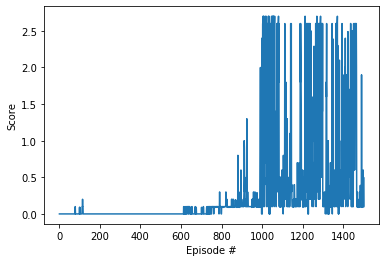

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1,len(scores_all)+1),scores_all)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 5. Watch a Smart Agent

In [9]:
agent = Agent(state_size=state_size,action_size=action_size,num_agents=num_agents,random_seed=3)

agent.actor_local.load_state_dict(torch.load('checkpoint_actor.pth'))
agent.critic_local.load_state_dict(torch.load('checkpoint_critic.pth'))

env.info = env.reset(train_mode=False)[brain_name]
state = env_info.vector_observations
while True:
    action = agent.act(state)
    env_info = env.step(action)[brain_name]
    next_state = env_info.vector_observations
    reward = env_info.rewards
    done = env_info.local_done
    state = next_state
    if np.any(done):
        break

In [10]:
env.close()